In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ydata_profiling import ProfileReport

df = pd.read_csv('data/insurance.csv')

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
profile = ProfileReport(df, title = 'Insurance')

profile.to_widgets()

In [5]:
df['age'].min()

18

In [6]:
df['age'].max()

64

In [7]:
df.charges.min()

1121.8739

In [8]:
df.charges.max()

63770.42801

<Axes: xlabel='age', ylabel='Count'>

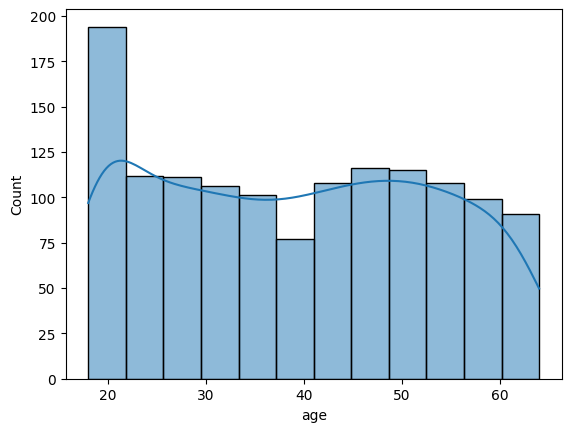

In [9]:
sns.histplot(data = df, x = 'age')#, kde = True)

<Axes: xlabel='sex', ylabel='count'>

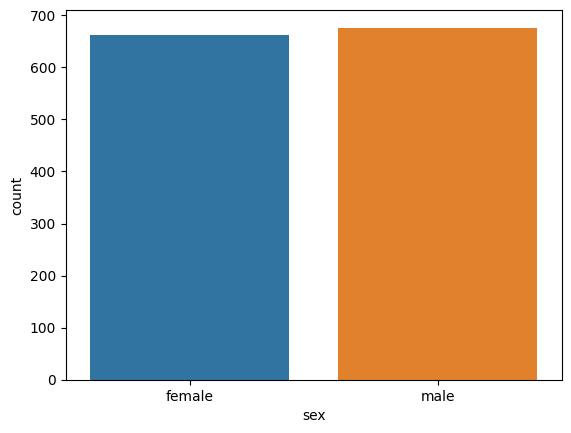

In [10]:
sns.countplot(data=df, x='sex', hue = 'sex')

<Axes: xlabel='region', ylabel='count'>

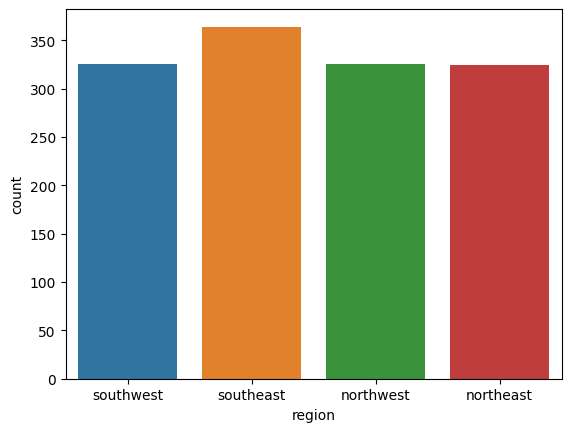

In [11]:
sns.countplot(data=df, x='region', hue = 'region')

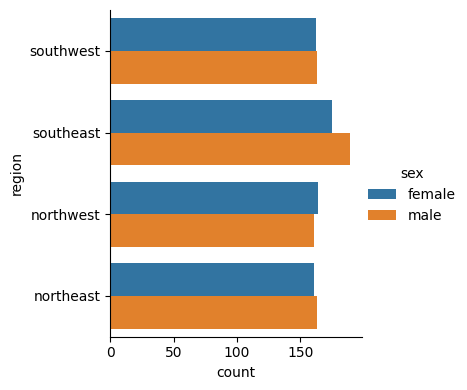

In [12]:
sns.catplot(data = df, y = 'region', hue = 'sex', kind = 'count', height = 4, aspect = 1)

In [13]:
df.pivot_table(index='region', columns='sex', aggfunc='size')

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


<Axes: xlabel='count', ylabel='smoker'>

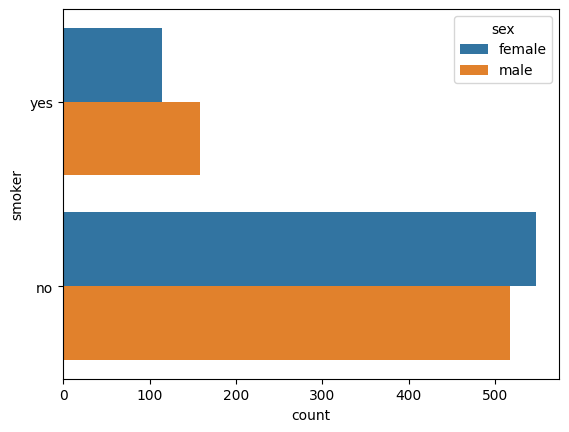

In [14]:
sns.countplot(data = df, y = 'smoker', hue = 'sex')

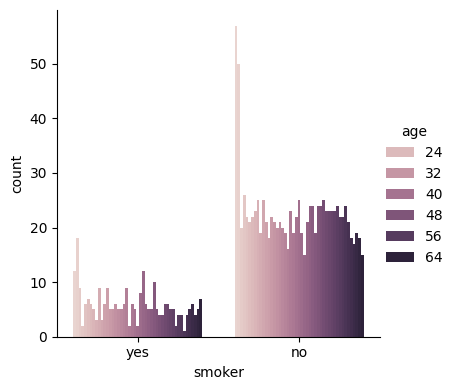

In [38]:
sns.catplot(data = df, x = 'smoker', hue = 'age', kind = 'count', height = 4)

<Axes: xlabel='smoker', ylabel='charges'>

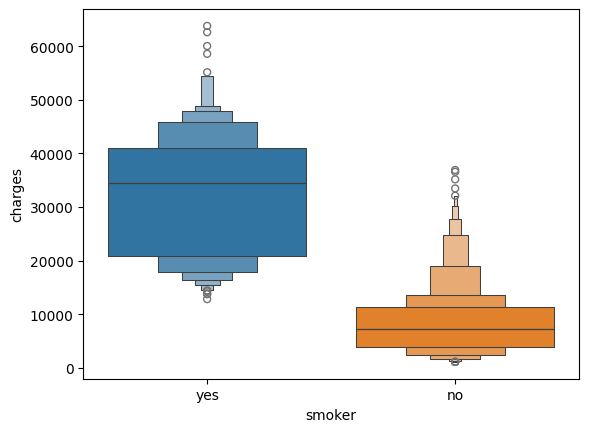

In [40]:
sns.boxenplot(data = df, x = 'smoker', hue = 'smoker', y = 'charges')

<Axes: xlabel='sex', ylabel='charges'>

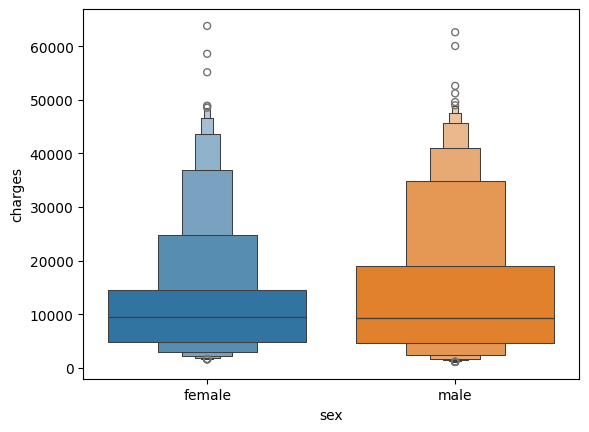

In [41]:
sns.boxenplot(data = df, x = 'sex', hue = 'sex', y = 'charges')

<Axes: ylabel='charges'>

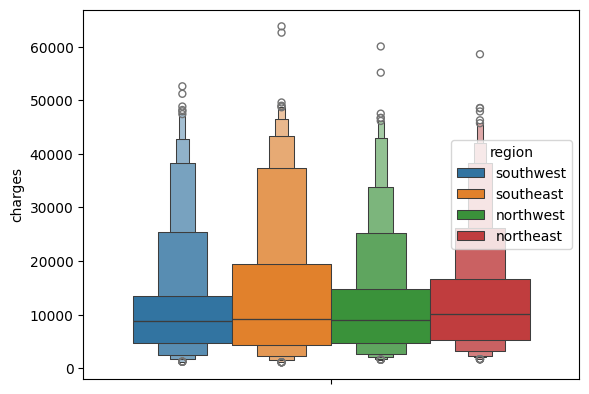

In [18]:
sns.boxenplot(data = df, hue = 'region', y = 'charges')

<Axes: xlabel='bmi', ylabel='Count'>

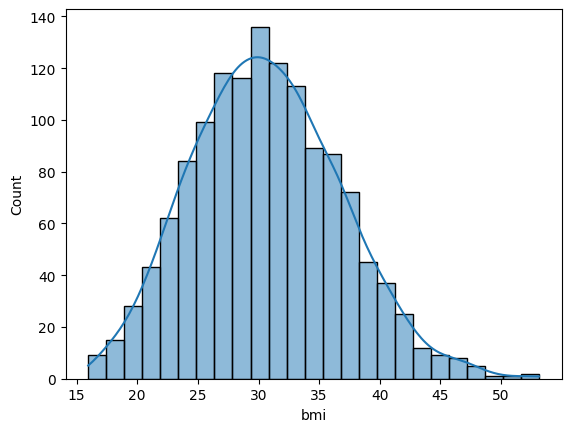

In [19]:
sns.histplot(data = df, x = 'bmi')#, kde=True)

In [ ]:
#sns.lineplot(data = df, x = 'bmi', y = 'charges')

In [20]:
m_w_c = df[(df['sex'] == 'male') & (df['children'] > 0)]
m_wo_c = df[(df['sex'] == 'male') & (df['children'] == 0)]
f_w_c = df[(df['sex'] == 'female') & (df['children'] > 0)]
f_wo_c = df[(df['sex'] == 'female') & (df['children'] == 0)]

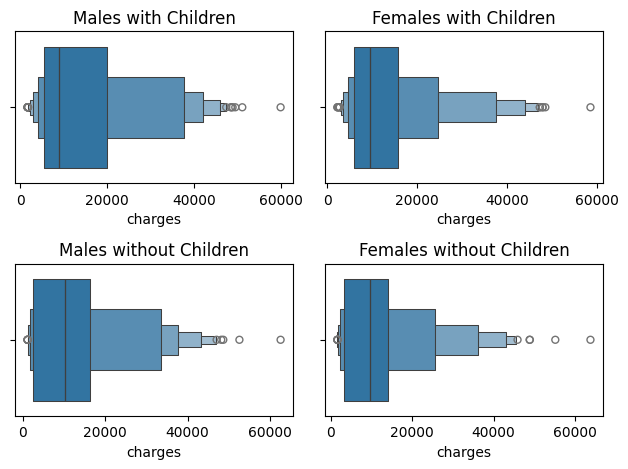

In [21]:
plt.subplot(2, 2, 1)
sns.boxenplot(x = 'charges', data = m_w_c)
plt.title('Males with Children')

plt.subplot(2, 2, 2)
sns.boxenplot(x = 'charges', data = f_w_c)
plt.title('Females with Children')

plt.subplot(2, 2, 3)
sns.boxenplot(x = 'charges', data = m_wo_c)
plt.title('Males without Children')

plt.subplot(2, 2, 4)
sns.boxenplot(x = 'charges', data = f_wo_c)
plt.title('Females without Children')

plt.tight_layout()
plt.show()

In [22]:
m_smoker = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]
m_n_smoker = df[(df['sex'] == 'male') & (df['smoker'] == 'no')]
f_smoker = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]
f_n_smoker = df[(df['sex'] == 'female') & (df['smoker'] == 'no')]

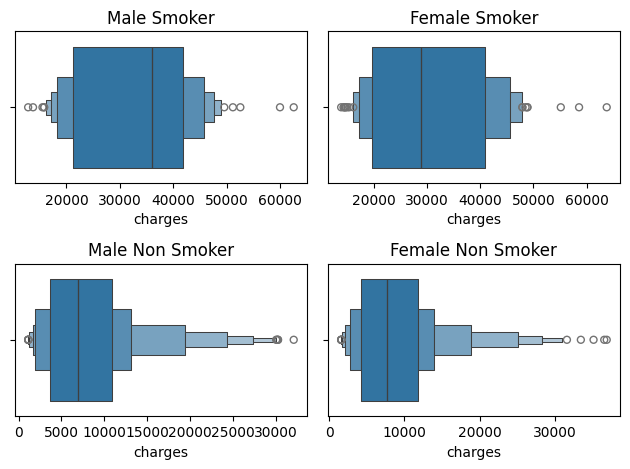

In [23]:
plt.subplot(2, 2, 1)
sns.boxenplot(x = 'charges', data = m_smoker)
plt.title('Male Smoker')

plt.subplot(2, 2, 2)
sns.boxenplot(x = 'charges', data = f_smoker)
plt.title('Female Smoker')

plt.subplot(2, 2, 3)
sns.boxenplot(x = 'charges', data = m_n_smoker)
plt.title('Male Non Smoker')

plt.subplot(2, 2, 4)
sns.boxenplot(x = 'charges', data = f_n_smoker)
plt.title('Female Non Smoker')

plt.tight_layout()
plt.show()

In [24]:
fig = px.box(df, x = 'age', y = "charges", title = '<b>Charges</b>')
fig.show()

In [35]:
fig = px.box(df, x = 'sex', y="children", color ="sex", width = 600, height = 600)
fig.show()

In [36]:
fig = px.box(df, color = "smoker", y = "children", width = 600, height = 600)
fig.show()

In [27]:
fig = px.box(df, x="region", y="charges", color="smoker")
fig.show()

In [28]:
sorted_child = sorted(df['children'].unique())

fig = px.box(df, x="region", y="charges", color="children", category_orders = {'children' : sorted_child})
fig.show()

In [37]:
fig = px.box(df, color = "region", y = "bmi", width = 600)
fig.show()

In [30]:
fig = px.scatter(df, x = "charges", y = "age", color = 'children')
fig.show()